<a href="https://colab.research.google.com/github/minsugaa1993/python/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mengaktifkan SQLite

In [1]:
import sqlite3
import pandas as pd
import csv

In [2]:
conn = sqlite3.connect("imdb_movies-dataset.csv")
cursor = conn.cursor()

#Mengunggah Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

# Membaca dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Menampilkan lima baris pertama
df.head()

Saving imdb-movies-dataset.csv to imdb-movies-dataset (1).csv


,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


#Menyimpan Dataset ke SQLite

In [4]:
# Menyimpan dataset ke tabel SQL

# Ubah nama kolom agar sesuai dengan SQL
df.columns = df.columns.str.replace(' ', '_').str.lower()

df.to_sql("movies", conn, if_exists="replace", index=False)

10000

#Eksplorasi Data Menggunakan SQL

1. Melihat Struktur Data

In [5]:
query = "PRAGMA table_info(movies);"
df_info = pd.read_sql(query, conn)
df_info

,cid,name,type,notnull,dflt_value,pk
0,0,poster,TEXT,0,None,0
1,1,title,TEXT,0,None,0
2,2,year,REAL,0,None,0
3,3,certificate,TEXT,0,None,0
4,4,duration_(min),REAL,0,None,0
5,5,genre,TEXT,0,None,0
6,6,rating,REAL,0,None,0
7,7,metascore,REAL,0,None,0
8,8,director,TEXT,0,None,0
9,9,cast,TEXT,0,None,0


2. Mencari Film dengan Rating Tertinggi

In [6]:
query = """
SELECT title, rating, year
FROM movies
ORDER BY rating DESC
LIMIT 10;
"""
df_top_movies = pd.read_sql(query, conn)
df_top_movies

,title,rating,year
0,August,9.7,1985.0
1,Just Now Jeffrey,9.5,2006.0
2,Los Frikis,9.5,1976.0
3,The Shawshank Redemption,9.3,2023.0
4,The Godfather,9.2,2023.0
5,"Men Are from QC, Women Are from Alabang",9.1,2015.0
6,The Dark Knight,9.0,2002.0
7,The Lord of the Rings: The Return of the King,9.0,2002.0
8,Schindler's List,9.0,2002.0
9,12 Angry Men,9.0,1997.0


3. Menganalisis Tren Genre Selama 5 Tahun Terakhir

In [7]:
query = """
SELECT genre, COUNT(*) AS jumlah_film
FROM movies
WHERE year >= strftime('%Y', 'now') - 10
GROUP BY genre
ORDER BY jumlah_film DESC;
"""
df_genre_trend = pd.read_sql(query, conn)
df_genre_trend

,genre,jumlah_film
0,Drama,211
1,"Drama, Romance",143
2,"Comedy, Drama",135
3,"Comedy, Drama, Romance",126
4,Comedy,119
...,...,...
367,"Action, Comedy, War",1
368,"Action, Comedy, History",1
369,"Action, Biography, History",1
370,"Action, Biography, Comedy",1


4. Menghitung Rata-rata Rating Film

In [21]:
query = """
SELECT genre, AVG(rating) AS rata_rata_rating
FROM movies
GROUP BY genre
ORDER BY rata_rata_rating DESC;
"""
df_avg_rating = pd.read_sql(query, conn)
df_avg_rating

,genre,rata_rata_rating
0,"Documentary, War",8.60
1,"Documentary, Biography, Sport",8.50
2,"Drama, Mystery, War",8.35
3,"Documentary, Action, Mystery",8.30
4,Musical,8.20
...,...,...
471,"Family, Horror, Musical",NaN
472,"Drama, Crime",NaN
473,"Animation, Romance",NaN
474,"Animation, Comedy",NaN


5. Menghitung Jumlah Film per Tahun

In [22]:
query = """
SELECT year, COUNT(*) AS jumlah_film
FROM movies
GROUP BY year
ORDER BY year ASC;
"""
df_film_per_tahun = pd.read_sql(query, conn)
df_film_per_tahun

,year,jumlah_film
0,NaN,150
1,1929.0,50
2,1933.0,50
3,1934.0,50
4,1945.0,50
...,...,...
56,2021.0,500
57,2022.0,350
58,2023.0,850
59,2024.0,650


#Visualisasi Data

1. Visualisasi Tren Genre dalam 5 Tahun Terakhir

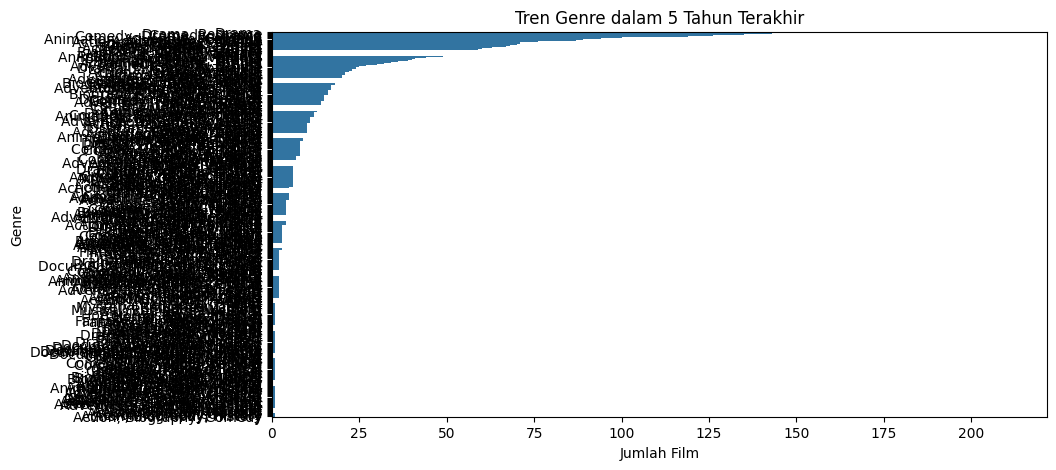

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x='jumlah_film', y='genre', data=df_genre_trend)
plt.xlabel("Jumlah Film")
plt.ylabel("Genre")
plt.title("Tren Genre dalam 5 Tahun Terakhir")
plt.show()

2. Visualisasi Rating Tertinggi

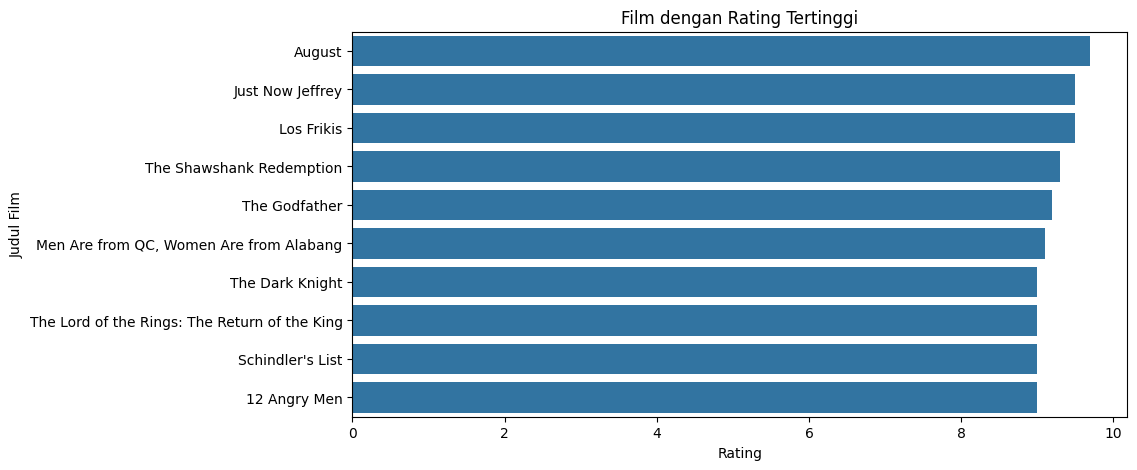

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='rating', y='title', data=df_top_movies)
plt.xlabel("Rating")
plt.ylabel("Judul Film")
plt.title("Film dengan Rating Tertinggi")
plt.show()

3.  Distribusi Rating Film

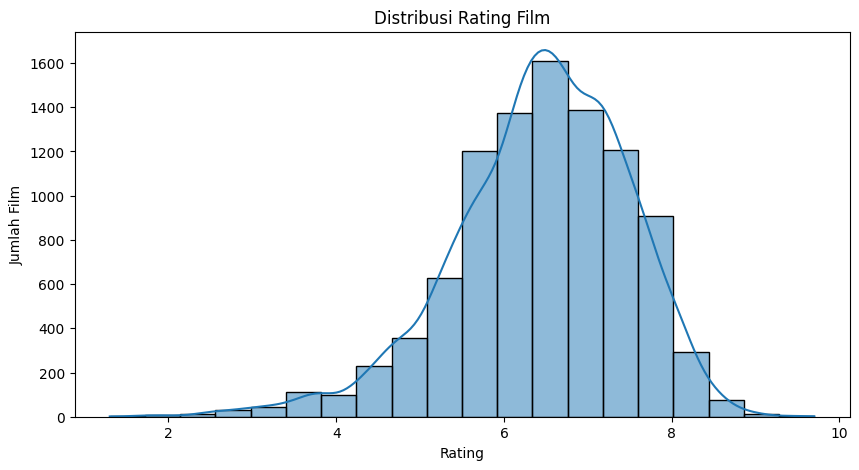

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df['rating'].dropna(), bins=20, kde=True)
plt.xlabel("Rating")
plt.ylabel("Jumlah Film")
plt.title("Distribusi Rating Film")
plt.show()

4. Prediksi Genre Favorit 5 Tahun Mendatang

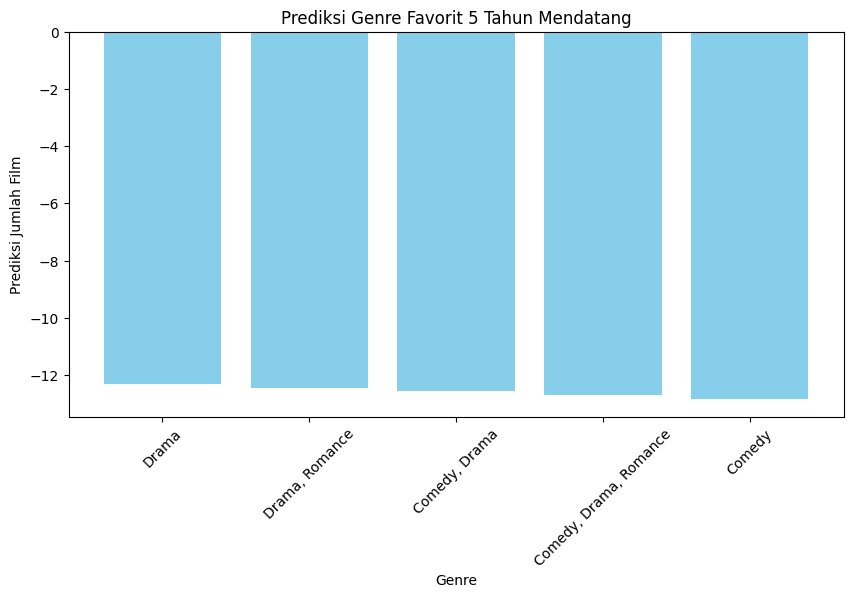

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Menyiapkan data tren genre
trend_data = df_genre_trend.copy()
trend_data['year'] = list(range(1, len(trend_data) + 1))  # Asumsikan urutan tahun

# Model regresi linier
X = np.array(trend_data['year']).reshape(-1, 1)
y = np.array(trend_data['jumlah_film'])

model = LinearRegression()
model.fit(X, y)

# Prediksi untuk 5 tahun ke depan
tahun_mendatang = np.array([len(trend_data) + i for i in range(1, 6)]).reshape(-1, 1)
prediksi = model.predict(tahun_mendatang)

# Menampilkan genre terpopuler
prediksi_genre = trend_data['genre'][:5].values  # Ambil 5 genre teratas

# Visualisasi prediksi tren genre
plt.figure(figsize=(10,5))
plt.bar(prediksi_genre, prediksi, color='skyblue')
plt.xlabel("Genre")
plt.ylabel("Prediksi Jumlah Film")
plt.title("Prediksi Genre Favorit 5 Tahun Mendatang")
plt.xticks(rotation=45)
plt.show()

5. Visualisasi Perbandingan Rating dan Votes

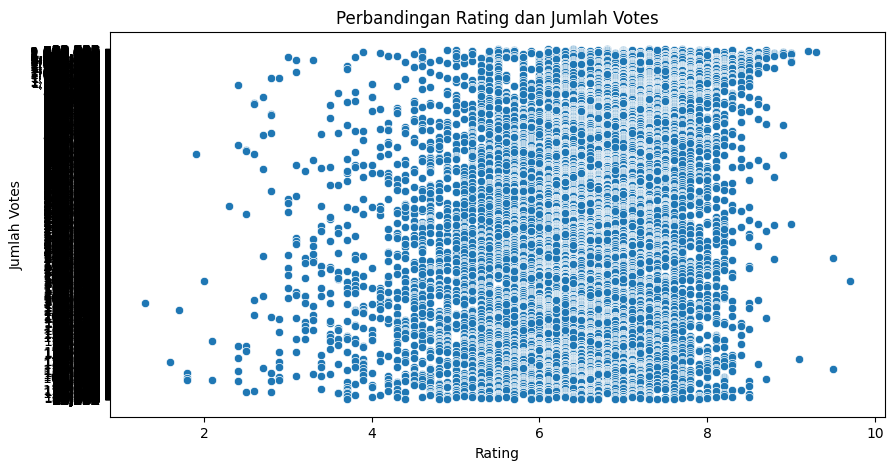

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['rating'], y=df['votes'])
plt.xlabel("Rating")
plt.ylabel("Jumlah Votes")
plt.title("Perbandingan Rating dan Jumlah Votes")
plt.show()